In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as s
import scipy.stats as ss

In [2]:
data=pd.read_csv(r"C:\Users\seeth\python 232\Statistics\cleaned data of autos.csv")

In [3]:
df=data.copy()

In [4]:
df

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-24,Golf_3_1.6,privat,Angebot,480,test,not mentioned,1993,manuell,0,golf,150000,0,benzin,volkswagen,unknown,2016-03-24,70435,2016-04-07
1,2016-03-24,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja,2016-03-24,66954,2016-04-07
2,2016-03-14,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,unknown,2016-03-14,90480,2016-04-05
3,2016-03-17,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,91074,2016-03-17
4,2016-03-31,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,2016-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,not mentioned,2005,manuell,0,golf,20000,1,unknown,sonstige_autos,unknown,2016-03-14,39576,2016-04-06
371524,2016-03-05,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05,26135,2016-03-11
371525,2016-03-19,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,87439,2016-04-07
371526,2016-03-20,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,unknown,2016-03-20,40764,2016-03-24


### 1) The memory usage of the data is around 6.1 mb.How can we reduce the memory usage of the data set?


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        371528 non-null  object
 1   name                371528 non-null  object
 2   seller              371528 non-null  object
 3   offer_type          371528 non-null  object
 4   price               371528 non-null  int64 
 5   abtest              371528 non-null  object
 6   vehicle_type        371528 non-null  object
 7   registration_year   371528 non-null  int64 
 8   gearbox             371528 non-null  object
 9   power_ps            371528 non-null  int64 
 10  model               371528 non-null  object
 11  odometer            371528 non-null  int64 
 12  registration_month  371528 non-null  int64 
 13  fuel_type           371528 non-null  object
 14  brand               371528 non-null  object
 15  unrepaired_damage   371528 non-null  object
 16  ad

In [6]:
df["price"] = df["price"].astype(np.uint32)
df["odometer"] = df["odometer"].astype(np.uint32)
df["power_ps"] = df["power_ps"].astype(np.uint16)
df["registration_month"] = df["registration_month"].astype(np.uint8)
df["registration_year"] = df["registration_year"].astype(np.uint16)
df["postal_code"] = df["postal_code"].astype(np.uint32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        371528 non-null  object
 1   name                371528 non-null  object
 2   seller              371528 non-null  object
 3   offer_type          371528 non-null  object
 4   price               371528 non-null  uint32
 5   abtest              371528 non-null  object
 6   vehicle_type        371528 non-null  object
 7   registration_year   371528 non-null  uint16
 8   gearbox             371528 non-null  object
 9   power_ps            371528 non-null  uint16
 10  model               371528 non-null  object
 11  odometer            371528 non-null  uint32
 12  registration_month  371528 non-null  uint8 
 13  fuel_type           371528 non-null  object
 14  brand               371528 non-null  object
 15  unrepaired_damage   371528 non-null  object
 16  ad

###  2) What is the Average price of vehicle by fuel type and gearbox type.Give a plot

In [8]:
avg_price=df.groupby(["fuel_type","gearbox"])[["price"]].mean()
avg1=avg_price.reset_index()
avg1

,fuel_type,gearbox,price
0,andere,automatik,8.434172e+03
1,andere,manuell,1.199950e+07
2,benzin,automatik,1.224864e+04
3,benzin,manuell,8.208782e+03
4,cng,automatik,6.737718e+03
5,cng,manuell,4.517496e+03
6,diesel,automatik,1.881035e+04
7,diesel,manuell,8.536019e+03
8,elektro,automatik,2.290028e+04
9,elektro,manuell,3.822320e+03


Text(0.5, 1.0, 'Average price of vehicle by fuel type and gearbox type')

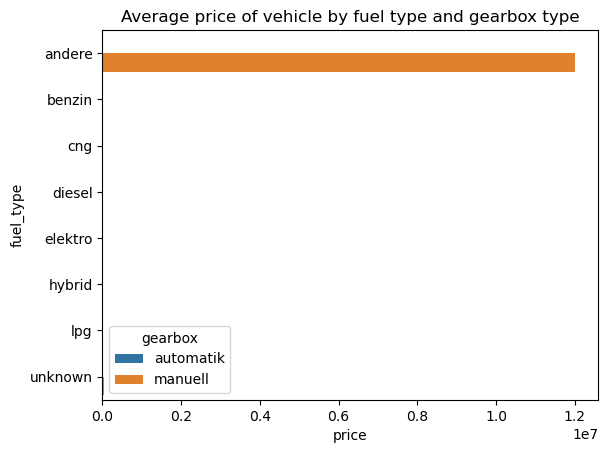

In [9]:
sns.barplot(data=avg1,x="price",y="fuel_type",hue="gearbox")
plt.title("Average price of vehicle by fuel type and gearbox type")

### 3) What is the Average power of a vehicle by vehicle type and gearbox type.Give a plot

In [10]:
avg_power=df.groupby(["vehicle_type","gearbox"])[["power_ps"]].mean()
avg2=avg_power.reset_index()
avg2

,vehicle_type,gearbox,power_ps
0,andere,automatik,124.922438
1,andere,manuell,99.375501
2,bus,automatik,140.884166
3,bus,manuell,108.204303
4,cabrio,automatik,188.922414
5,cabrio,manuell,130.729464
6,coupe,automatik,218.719307
7,coupe,manuell,151.884799
8,kleinwagen,automatik,75.040381
9,kleinwagen,manuell,68.243105


Text(0.5, 1.0, 'Average power of a vehicle by vehicle type and gearbox type')

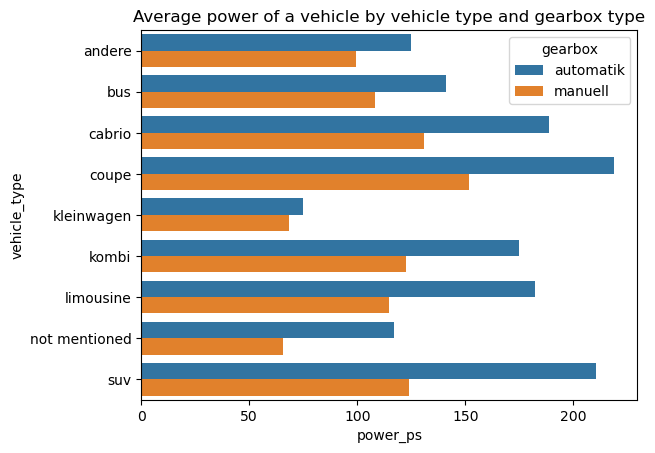

In [11]:
sns.barplot(data=avg2,x="power_ps",y="vehicle_type",hue="gearbox")
plt.title("Average power of a vehicle by vehicle type and gearbox type")

### 4) What is the Average price of a vehicle by brand as well as vehicle type.Use heatmap to explain this

In [12]:
avg_power=df.groupby(["vehicle_type","brand"])[["price"]].mean()
avg3=avg_power.reset_index()
avg3

,vehicle_type,brand,price
0,andere,alfa_romeo,3153.333333
1,andere,audi,97681.198347
2,andere,bmw,2686.438525
3,andere,chevrolet,10032.803922
4,andere,chrysler,8888.333333
...,...,...,...
331,suv,suzuki,6721.187251
332,suv,toyota,10104.163673
333,suv,trabant,14500.000000
334,suv,volkswagen,15898.968344


<Axes: xlabel='vehicle_type', ylabel='brand'>

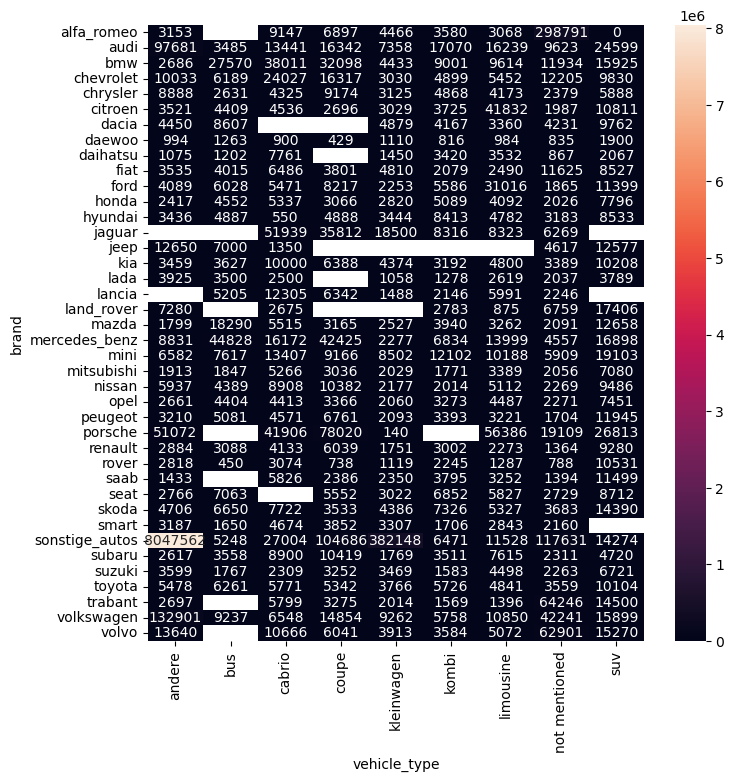

In [28]:
plt.figure(figsize=(8,8))
sns.heatmap(pd.crosstab(df["brand"],df["vehicle_type"],values=df["price"],aggfunc="mean"),annot=True,fmt=".0f")